Предсказание стоимости медицинской страховки с использованием линейной регрессии

Ограничения линейной регрессии
Линейность: зависимая переменная может линейно аппроксимировать независимые переменные
Нормальность распределения зависимой переменной и остатков (ошибки)
Гомоскедастичность распределения остатков
Отсутствие мультиколлинеарности

Будем использовать набор данных по адресу: https://www.kaggle.com/mirichoi0218/insurance/download

In [ ]:
Описание набора данных, в каждой строке данны по одному человеку:
    age - возраст застрахованного лица
    Sex - пол 
    BMI - индекс массы тела
    Children - количество детей
    Smoker - Курит или нет
    Region - в каком регионе проживает
    Charges - индивидуальные медицинские расходы, оплаченные страховкой - зависимая переменная

Загрузим наш набор данных и необходимые библиотеки

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
df = pd.read_csv("c:/ulka/insurance.csv",sep=',')

Рассмотрим начальные строки нашего набора данных.

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Для учета в регрессионной модели столбцы Male, region и smoker переведем в числовой вид.

In [4]:
df['Male']=pd.get_dummies(df['sex'],drop_first=True)
df.drop(['sex'],axis=1,inplace=True)

In [5]:
df['Smoke']=pd.get_dummies(df['smoker'],drop_first=True)
df.drop(['smoker'],axis=1,inplace=True)

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['region'] = le.fit_transform(df['region'])

In [7]:
df.head()

,age,bmi,children,region,charges,Male,Smoke
0,19,27.900,0,3,16884.92400,0,1
1,18,33.770,1,2,1725.55230,1,0
2,28,33.000,3,2,4449.46200,1,0
3,33,22.705,0,1,21984.47061,1,0
4,32,28.880,0,1,3866.85520,1,0


Видим, что теперь во всех стобцах числовые данные
Посмотреть краткую статистичискую информацию по всем столбцам можно командой df.describe()

In [8]:
df.describe()

,age,bmi,children,region,charges,Male,Smoke
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,1.515695,13270.422265,0.505232,0.204783
std,14.049960,6.098187,1.205493,1.104885,12110.011237,0.500160,0.403694
min,18.000000,15.960000,0.000000,0.000000,1121.873900,0.000000,0.000000
25%,27.000000,26.296250,0.000000,1.000000,4740.287150,0.000000,0.000000
50%,39.000000,30.400000,1.000000,2.000000,9382.033000,1.000000,0.000000
75%,51.000000,34.693750,2.000000,2.000000,16639.912515,1.000000,0.000000
max,64.000000,53.130000,5.000000,3.000000,63770.428010,1.000000,1.000000


С помощью команды df.corr() можно увидеть корреляцию между переменными.
Одним из условий применения множественной линейной регрессии является отсутствие корреляции между независимыми переменными, что мы и проверим.

In [9]:
df.corr()

,age,bmi,children,region,charges,Male,Smoke
age,1.000000,0.109272,0.042469,0.002127,0.299008,-0.020856,-0.025019
bmi,0.109272,1.000000,0.012759,0.157566,0.198341,0.046371,0.003750
children,0.042469,0.012759,1.000000,0.016569,0.067998,0.017163,0.007673
region,0.002127,0.157566,0.016569,1.000000,-0.006208,0.004588,-0.002181
charges,0.299008,0.198341,0.067998,-0.006208,1.000000,0.057292,0.787251
Male,-0.020856,0.046371,0.017163,0.004588,0.057292,1.000000,0.076185
Smoke,-0.025019,0.003750,0.007673,-0.002181,0.787251,0.076185,1.000000


Для удобства можно построить тепловую карту корреляции переменных.

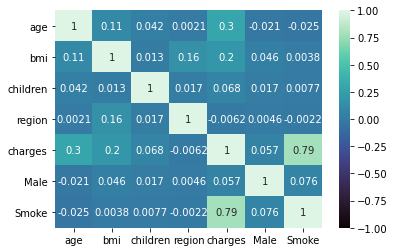

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr()
plt.figure()
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.show()
#нет корреляции между независимыми переменными

Корреляции между независимыми переменными нет. 
Можно увидеть значительную положительную корреляцию между зависимой переменной charges и независимой переменной smoker.

Посмотрим распределение зависимой переменной. 

Text(0.5, 1.0, 'Distribution of insurance charges')

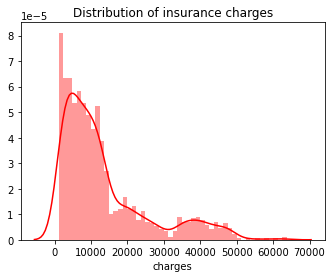

In [11]:
f= plt.figure(figsize=(12,4))
ax=f.add_subplot(121)
sns.distplot(df['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

Распределение не совсем похоже на стандартное распределение, но так как это желательно, а не обязательно для применения множественной линейной регрессии, то оставляем, как есть.

Далее посмотрим графики аттрибута smoker в осях - возраст и расходы, и в осях - индекс массы и расходы.

Text(0.5, 1.0, 'Scatter plot of Charges vs bmi')

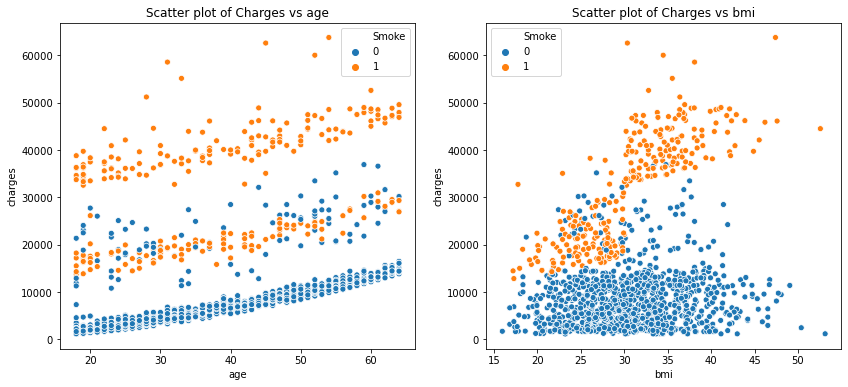

In [12]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='charges',data=df,hue='Smoke',ax=ax)
ax.set_title('Scatter plot of Charges vs age')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',data=df,hue='Smoke')
ax.set_title('Scatter plot of Charges vs bmi')
#проверка на линейность

По этим графикам можно предположить линейную зависимость между данными, то есть условие линейной зависимости выполняется.

Ради интереса, изучим график аттрибута smoker в осях - индекс массы и расходы немного подробнее.

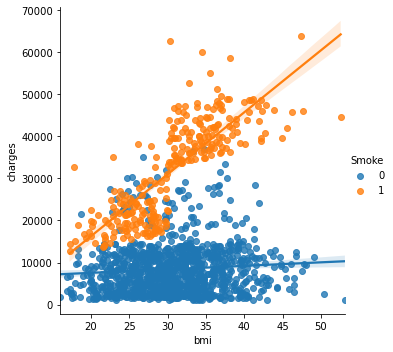

In [13]:
sns.lmplot(x = 'bmi',y = 'charges', hue = 'Smoke' , data=df)

По этому графика сразу можно сказать, что для тех, кто курит, медицинская страховка стоит больше.
Наклон регрессионной прямой для тех, кто курит, намного больше чем для тех, кто не курит.

Присвоим переменной x значения датафрейма без стоблца charges, соответственно, присвоим переменной y значение стоблца charges.

In [17]:
x=df.drop(['charges'],axis=True)
y= df['charges']

Теперь разделим наш набор данных на обучающий и тестовый. После получения коэффициентов линейной регрессии сравним 
тестовые значения с предсказанными, чтобы вычислить остатки.

In [18]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size = 0.2 , random_state = 51)

Посмотрим размеры наших тестовых и обучающих наборов данных.

In [19]:
print(" Shape of x_train = ", x_train.shape)
print(" Shape of x_test = ", x_test.shape)
print(" Shape of y_train = ", y_train.shape)
print(" Shape of y_test = ", y_test.shape)

 Shape of x_train =  (1070, 6)
 Shape of x_test =  (268, 6)
 Shape of y_train =  (1070,)
 Shape of y_test =  (268,)


Теперь сама множественная линейная регрессия

In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression() 
lr.fit(x_train, y_train)

LinearRegression()

Посмотрим вычисленные значения интерсепта и коэффициентов.

In [49]:
print("Интерсепт : " , lr.intercept_)
print("Коэффициенты : " , lr.coef_)

Интерсепт :  -10765.786279859534
Коэффициенты :  [  245.95085664   314.38928572   506.98665353  -394.4894922
  -194.61360132 23721.07199859]


Посмотрим на сравнение реальных и вычисленных данных.

In [29]:
y_pred = lr.predict(x_test)
y_pred_df = pd.DataFrame(y_pred, columns=["Predicted Values" ])
y_test_df = pd.DataFrame(np.array(y_test), columns=["Real Values"])
pd.concat([y_test_df , y_pred_df] , axis=1)

,Real Values,Predicted Values
0,7789.63500,9393.624039
1,52590.82939,36646.223611
2,2464.61880,3062.926295
3,8964.06055,11238.198981
4,39556.49450,33945.600571
...,...,...
263,6610.10970,12346.891288
264,18648.42170,28041.725070
265,32548.34050,26155.035302
266,45710.20785,38074.798212


Вычислим значение коэффициента детерминации.

In [47]:
from sklearn.metrics import r2_score
score = r2_score(y_test , y_pred)
print(f"Коэффициент детерминации: {score}") # 0.7493031580280478

Коэффициент детерминации: 0.7493031580280478


Проверим остатки на стандартность распределения.

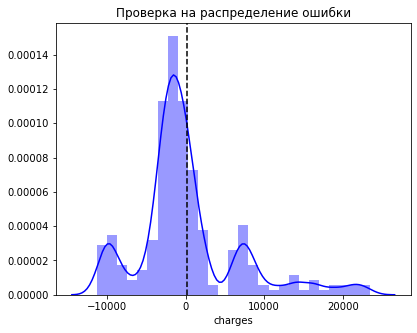

In [32]:
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(122)
sns.distplot((y_test - y_pred),ax=ax,color='b')
ax.axvline((y_test - y_pred).mean(),color='k',linestyle='--')
ax.set_title('Проверка на распределение ошибки');

Видим, что ошибка распределение ошибки достаточно похоже на стандартное.
Проверим распределение ошибки на гомоскедастичность.

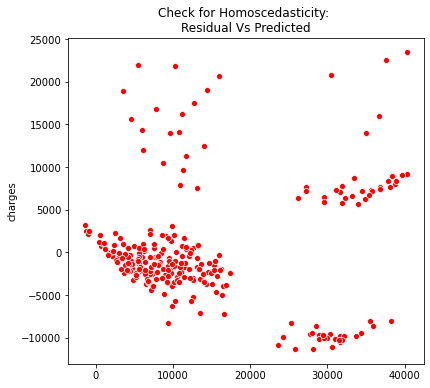

In [34]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(122)
sns.scatterplot(y = (y_test - y_pred), x= y_pred, ax = ax,color='r') 
ax.set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

Видим, что распределение ошибок предсказания не совсем гомоскедастично, значит после определенного 
порога ошибка будет возрастать.

Исследуем нашу модель на статистическую значимость. Для этого найдем табличный критерий Фишера и сравним с рассчитанным критерием Фишера.

In [44]:
from scipy.stats import f
alpha=0.05
df1 = 6 - 1
df2 = len(y) - 1
p_value = f.ppf(alpha, 5, 1337) # 0.2723232107967019
print(f'Табличный критерий Фишера = {p_value}')

Табличный критерий Фишера = 0.2723232107967019


Рассчитаем критерий Фишера для нашего набора данных по формуле F = (R**2/(1-R**2))*((n-m-1)/m), где R**2 - это коэффициент детерминации, n - количество измерений, m - количество независимых переменных.

In [46]:
n=1338
m=6
F = ((n-m-1)/m)*(score/(1-score)) # 663.0335504631204
print(f'Рассчитанный критерий Фишера = {F}')

Рассчитанный критерий Фишера = 663.0335504631204


Рассчитанный критерий Фишера больше, чем табличный, значит наша модель статистически значима на уровне 5%.

Выводы:
    После обучения модели мы получили уравнение линейной регрессии:
    y = -10765.78 + 245.95*x1 + 314.38*x2 + 506.98*x3 - 394.48*x4 - 194.61*x5 + 23721.07*x6
    По коэффициентам видно, что наибольшее влияние на нашу модель оказывает признак курения.
    Критерии применимости множественной линейной регрессии достаточно хорошо выполняются для данного набора данных.
    Модель является статистически значимой на уровне значимости 5%.
    Коэффициент детерминации равен 75%, то есть рассчитанная модель на 75% хорошо предсказывает расходы на медицинскую страховку.
    Но думаю, что можно получить лучшие результаты, если переставить независмые перменные местами, либо использовать другую модель.
    